# Extra Gal Project 2

## Imports

In [3]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm

In [4]:
from galaxy import Galaxy
from redshift import Redshift

## Paths

In [20]:
ROOT = sys.prefix[:-4]
DATA_DIR = ROOT + 'data/Uchuu-UM/'

FILES = [
            'Sample.01.Redshift.0.000.h5',
            'Sample.01.Redshift.1.032.h5',
            'Sample.01.Redshift.2.029.h5',
            'Sample.01.Redshift.3.129.h5',
            'Sample.01.Redshift.4.269.h5',
            'Sample.01.Redshift.5.155.h5'
        ]

PATHS = [DATA_DIR + f for f in FILES]

## Data processing

In [21]:
redshifts = []

for p in tqdm(PATHS):
    r = Redshift(p)
    redshifts.append(r)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/44575694 [00:00<?, ?it/s]

  0%|          | 0/37936819 [00:00<?, ?it/s]

  0%|          | 0/28383722 [00:00<?, ?it/s]

  0%|          | 0/20086792 [00:00<?, ?it/s]

  0%|          | 0/12652598 [00:00<?, ?it/s]

  0%|          | 0/8077069 [00:00<?, ?it/s]

In [14]:
print(redshifts[0])
#print(redshifts[1].galaxies[0])

<Redshift Box:750 Ngalaxies:44575694 Redshift:2.0000399672426283e-05>


## (1) Evolution of star formation in the whole Universe

In [28]:
M_LARGE = 5*(10**10)

In [67]:
z = []
SFR_all = []
SFR_large_galaxies = []
SFR_satellites = []

for i in trange(len(redshifts)):
    z.append(int(redshifts[i].Redshift))
    SFR_all.append(0)
    SFR_large_galaxies.append(0)
    SFR_satellites.append(0)
    for j in trange(redshifts[i].Ngalaxies):
        SFR_all[i] += redshifts[i].galaxies[j].SFR
        if redshifts[i].galaxies[j].M > M_LARGE:
            SFR_large_galaxies[i] += redshifts[i].galaxies[j].SFR
        if redshifts[i].galaxies[j].ID > 0:
            SFR_satellites[i] += redshifts[i].galaxies[j].SFR 
    SFR_all[i] /= redshifts[i].Box**3
    SFR_large_galaxies[i] /= redshifts[i].Box**3
    SFR_satellites[i] /= redshifts[i].Box**3

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/44575694 [00:00<?, ?it/s]

  0%|          | 0/37936819 [00:00<?, ?it/s]

  0%|          | 0/28383722 [00:00<?, ?it/s]

  0%|          | 0/20086792 [00:00<?, ?it/s]

  0%|          | 0/12652598 [00:00<?, ?it/s]

  0%|          | 0/8077069 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


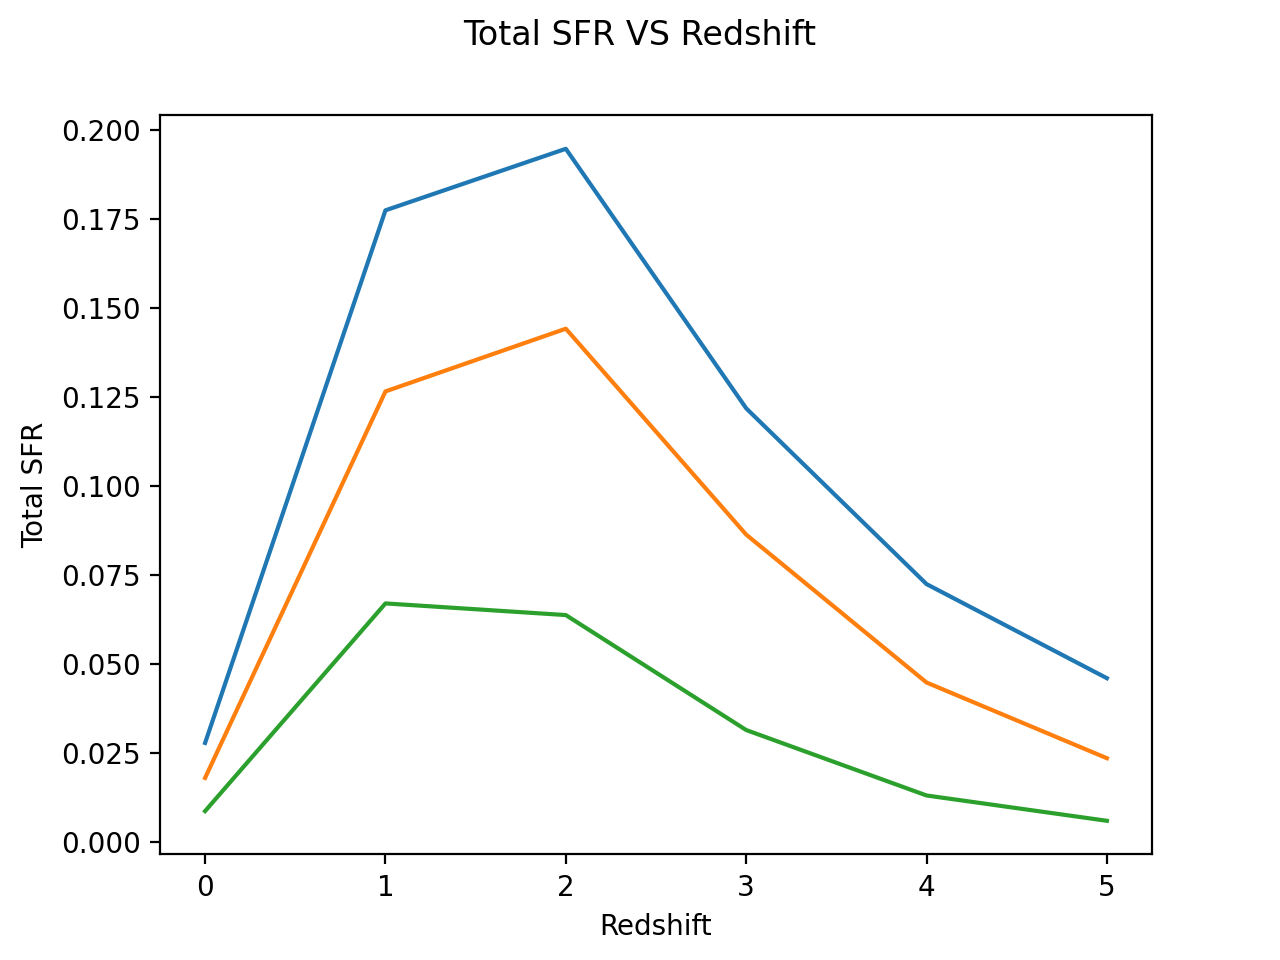

In [68]:
%matplotlib notebook

plt.suptitle("Total SFR VS Redshift")
plt.xlabel("Redshift")
plt.ylabel("Total SFR")
plt.plot(z, SFR_all, label="All")
plt.plot(z, SFR_large_galaxies, label="Large Galaxies")
plt.plot(z, SFR_satellites, label="Satellites")
plt.show()

In [ ]:
# Ho = 70
# OmegaM = 0.3
# OmegaVAC = 0.7

def lookback_time(z):
    pass

In [65]:
print(SFR_all)
print(SFR_large_galaxies)
print(SFR_satellites)

2147483647
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.02690248244274944, 0.1938175705497906, 0.2081642879248762, 0.11802978445035471, 0.058086008719443596, 0.029707400065953536]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## (2) Evolution of color bimodality

## (3) Are satellites redder or bluer as compared with the central galaxies?

In [63]:
x = []
y = []
s = []

for i in trange(len(redshifts)):
    x.append([])
    y.append([])
    s.append([])
    for j in trange(redshifts[i].Ngalaxies):
        if redshifts[i].galaxies[j].z >= 0 and redshifts[i].galaxies[j].z <= 10:
            x[i].append(redshifts[i].galaxies[j].x)
            y[i].append(redshifts[i].galaxies[j].y)
            s[i].append(SM_K*redshifts[i].galaxies[j].SM)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/44575694 [00:00<?, ?it/s]

  0%|          | 0/37936819 [00:00<?, ?it/s]

  0%|          | 0/28383722 [00:00<?, ?it/s]

  0%|          | 0/8077069 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


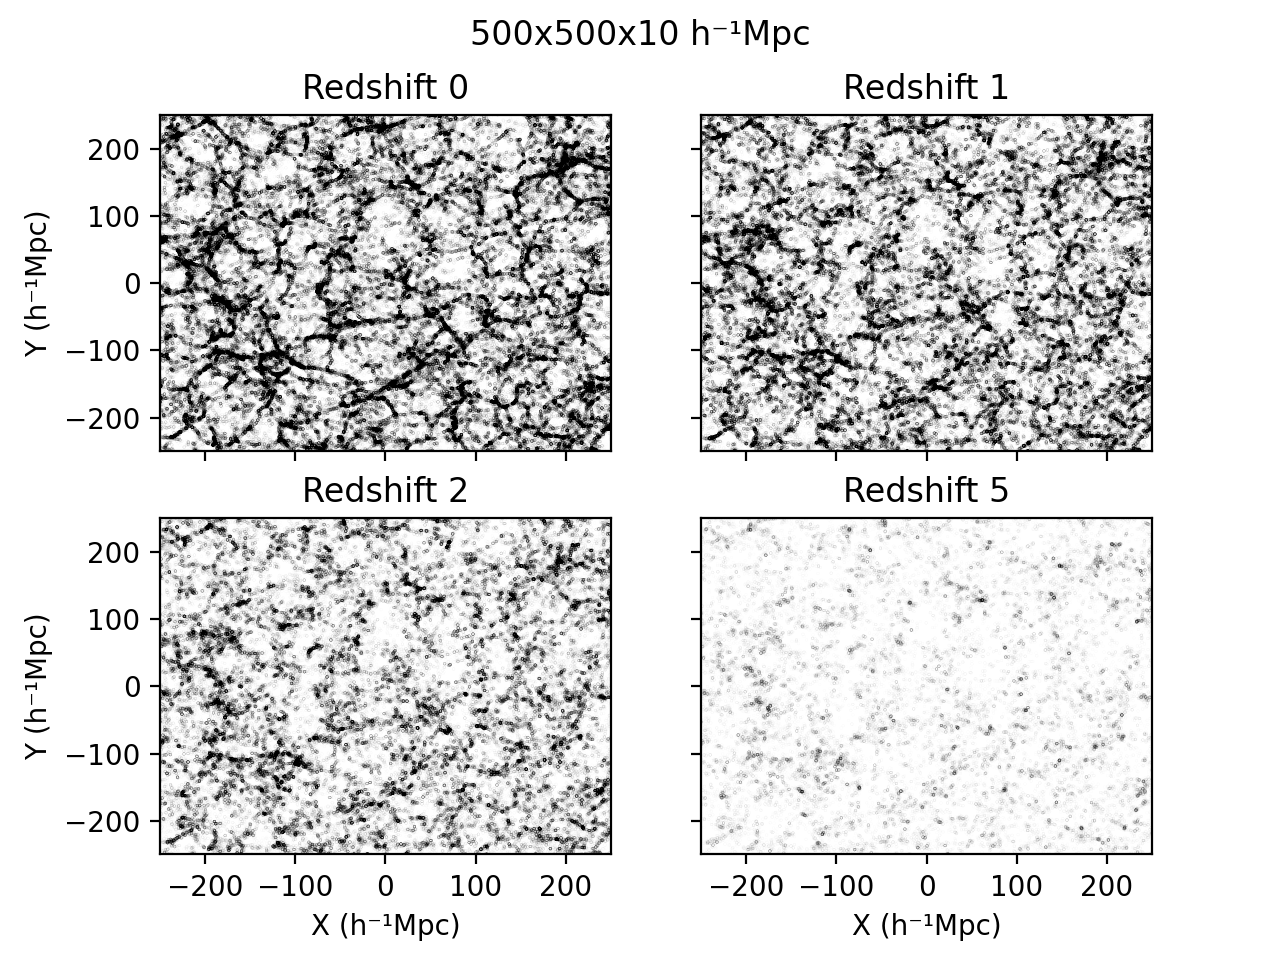

In [64]:
%matplotlib notebook

fig, axs = plt.subplots(2, 2)
fig.suptitle("500x500x10 h⁻¹Mpc")

for i, ax in enumerate(axs.flat):
    ax.scatter(x[i], y[i], s=s[i], c ='black')
    ax.set(xlabel='X (h⁻¹Mpc)', ylabel='Y (h⁻¹Mpc)')
    ax.set_title(f'Redshift {int(redshifts[i].Redshift)}')
    ax.set_xlim(-250, 250)
    ax.set_ylim(-250, 250)

for ax in axs.flat:
    ax.label_outer()

In [65]:
print(len(x[0]))

600328


In [66]:
START = -250
END = 250
LENGTH = 100
STEP = 10

In [80]:
count_x = 0
start_x = 0
start_y = 0
for i in trange(START, END-LENGTH+1, STEP):
    for j in range(START, END-LENGTH+1, STEP):
        tmp = 0
        for k in range(len(x[0])):
            tmp += (i <= x[0][k] and x[0][k] <= i+LENGTH and j <= y[0][k] and y[0][k] <= j+LENGTH)
        if tmp > 0: print(i, j, tmp)
        if tmp > count:
            start_x = i
            start_y = j
            count = tmp

  0%|          | 0/41 [00:00<?, ?it/s]

-250 -250 8681
-250 -240 7989
-250 -230 6949
-250 -220 5971
-250 -210 5260
-250 -200 4305
-250 -190 3427
-250 -180 2699
-250 -170 1815
-250 -160 1150
-240 -250 8028
-240 -240 7411
-240 -230 6406
-240 -220 5496
-240 -210 4819
-240 -200 3881
-240 -190 3076
-240 -180 2394
-240 -170 1612
-240 -160 1024
-230 -250 7212
-230 -240 6619
-230 -230 5671
-230 -220 5059
-230 -210 4393
-230 -200 3506
-230 -190 2752
-230 -180 2122
-230 -170 1430
-230 -160 903
-220 -250 5805
-220 -240 5219
-220 -230 4289
-220 -220 3782
-220 -210 3223
-220 -200 2635
-220 -190 2168
-220 -180 1594
-220 -170 977
-220 -160 532
-210 -250 4681
-210 -240 4164
-210 -230 3266
-210 -220 2774
-210 -210 2333
-210 -200 1975
-210 -190 1603
-210 -180 1146
-210 -170 700
-210 -160 359
-200 -250 3662
-200 -240 3182
-200 -230 2325
-200 -220 1953
-200 -210 1533
-200 -200 1300
-200 -190 1139
-200 -180 816
-200 -170 519
-200 -160 290
-190 -250 2946
-190 -240 2527
-190 -230 1823
-190 -220 1501
-190 -210 1219
-190 -200 1068
-190 -190 925
-190

In [81]:
print(start_x, start_x+LENGTH, start_y, start_y+LENGTH, count)
print(x)

0 100 0 100 8681
[[-245.193, -243.79, -243.65416, -243.73538, -243.76434, -243.60963, -242.829, -242.399, -242.66675, -243.812, -241.237, -245.218, -244.098, -245.14, -241.836, -249.11499, -243.492, -241.888, -244.329, -241.853, -241.655, -243.15, -240.718, -249.244, -249.64, -245.376, -242.607, -244.461, -241.586, -245.727, -245.7294, -241.89, -246.254, -241.331, -241.785, -244.844, -247.173, -247.636, -244.098, -240.668, -242.009, -249.978, -248.986, -241.794, -244.245, -242.4, -246.637, -246.366, -241.156, -244.622, -244.686, -243.664, -242.79, -242.078, -243.138, -242.102, -249.114, -246.92, -247.044, -242.473, -240.894, -248.43, -242.882, -243.719, -243.997, -242.609, -242.64925, -241.613, -243.636, -247.20801, -245.242, -243.385, -241.533, -242.052, -249.014, -248.489, -248.368, -242.513, -246.717, -240.948, -241.976, -242.252, -241.232, -242.439, -245.876, -240.91, -242.38, -241.958, -242.251, -243.303, -240.925, -246.413, -247.679, -243.216, -249.05, -244.306, -249.399, -249.16

In [70]:
new_x = []
new_y = []
new_s = []

for i in trange(len(redshifts)):
    new_x.append([])
    new_y.append([])
    new_s.append([])
    for j in trange(len(x[i])):
        if start <= x[i][j] and x[i][j] <= start+LENGTH and start <= y[i][j] and y[i][j] <= start+LENGTH:
            new_x[i].append(x[i][j])
            new_y[i].append(y[i][j])
            new_s[i].append(s[i][j])

x = new_x
y = new_y
s = new_s

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8681 [00:00<?, ?it/s]

  0%|          | 0/7797 [00:00<?, ?it/s]

  0%|          | 0/6165 [00:00<?, ?it/s]

  0%|          | 0/1792 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


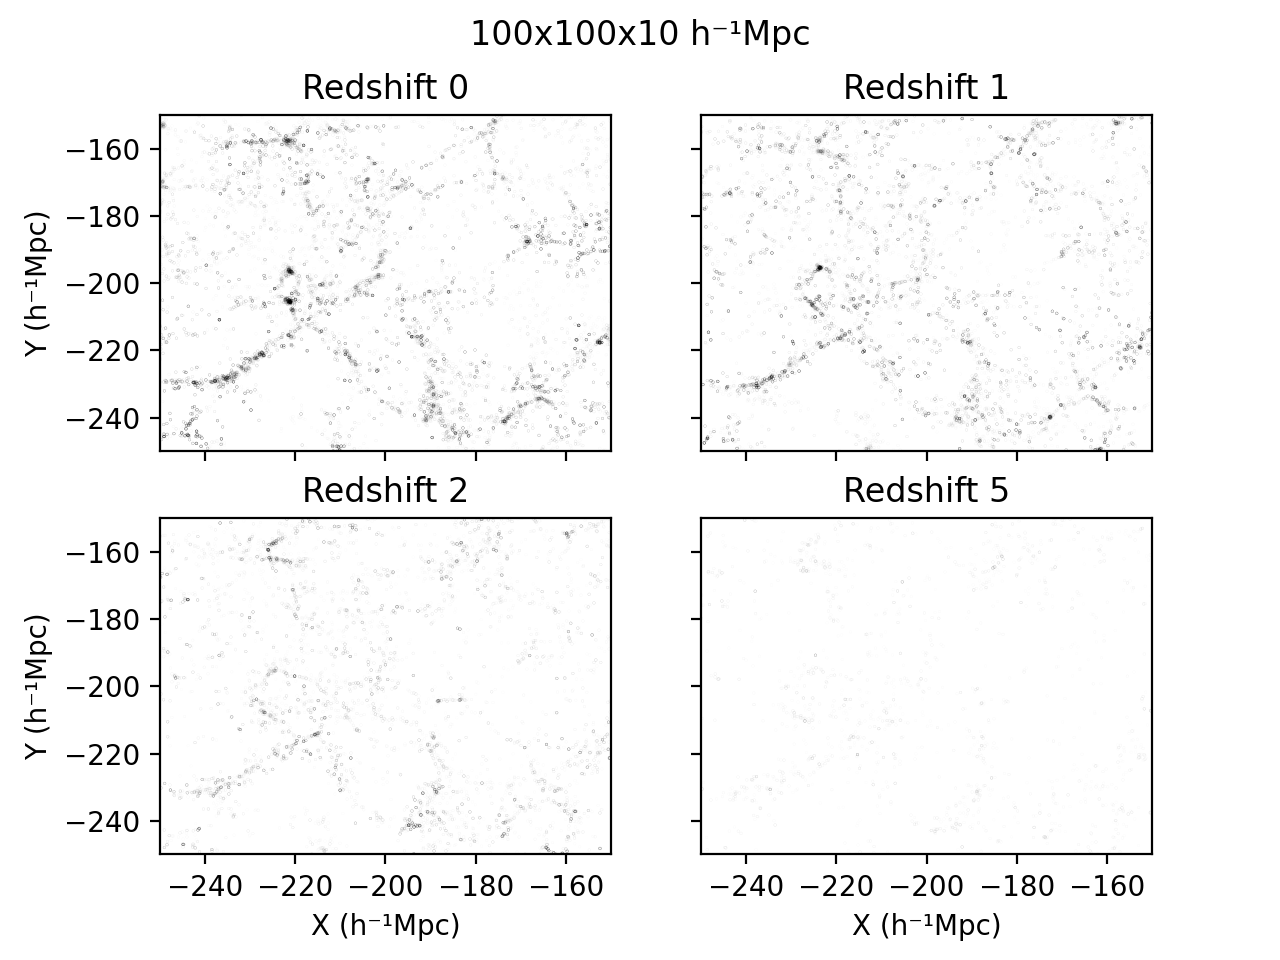

In [71]:
%matplotlib notebook

fig, axs = plt.subplots(2, 2)
fig.suptitle("100x100x10 h⁻¹Mpc")

for i, ax in enumerate(axs.flat):
    ax.scatter(x[i], y[i], s=s[i], c ='black')
    ax.set(xlabel='X (h⁻¹Mpc)', ylabel='Y (h⁻¹Mpc)')
    ax.set_title(f'Redshift {int(redshifts[i].Redshift)}')
    ax.set_xlim(start, start+LENGTH)
    ax.set_ylim(start, start+LENGTH)

for ax in axs.flat:
    ax.label_outer()